In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [55]:
# List of file paths
file_paths = [
    r"C:\Users\VOSKER\Downloads\f1 Project\circuits.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\constructor_results.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\constructor_standings.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\constructors.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\driver_standings.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\drivers.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\lap_times.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\pit_stops.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\qualifying.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\races.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\results.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\seasons.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\sprint_results.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\status.csv"
]

# Read each file using pandas
data = {}
for file_path in file_paths:
    file_name = file_path.split("\\")[-1].split(".")[0]  # Extracting file name without extension
    data[file_name] = pd.read_csv(file_path)


In [56]:
# List of file paths
file_paths = [
    r"C:\Users\VOSKER\Downloads\f1 Project\results.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\races.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\drivers.csv",
    r"C:\Users\VOSKER\Downloads\f1 Project\constructors.csv"
]

# Read each file using pandas
data = {}
for file_path in file_paths:
    file_name = file_path.split("\\")[-1].split(".")[0]  # Extracting file name without extension
    data[file_name] = pd.read_csv(file_path)

# Merge DataFrames
df = pd.merge(data["results"], data["races"][['raceId', 'year', 'round', 'circuitId']], on='raceId', how='left')
df = pd.merge(df, data["drivers"][['driverId', 'driverRef', 'forename', 'surname']], on='driverId', how='left')
df = pd.merge(df, data["constructors"][['constructorId', 'constructorRef', 'namey']], on='constructorId', how='left')

# Now you can use the merged DataFrame 'df'


In [57]:
# List of columns to be dropped
columns_to_drop = ['number', 'position', 'positionText', 'statusId']

# Drop the specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display the modified DataFrame
print(df.head())

   resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0         1      18         1              1     1              1    10.0   
1         2      18         2              2     5              2     8.0   
2         3      18         3              3     7              3     6.0   
3         4      18         4              4    11              4     5.0   
4         5      18         5              1     3              5     4.0   

   laps         time milliseconds  ... fastestLapTime fastestLapSpeed  year  \
0    58  1:34:50.616      5690616  ...       1:27.452         218.300  2008   
1    58       +5.478      5696094  ...       1:27.739         217.586  2008   
2    58       +8.163      5698779  ...       1:28.090         216.719  2008   
3    58      +17.181      5707797  ...       1:28.603         215.464  2008   
4    58      +18.014      5708630  ...       1:27.418         218.385  2008   

  round  circuitId   driverRef  forename     surname construct

In [58]:
# Define a dictionary mapping original column names to new column names
columns_to_rename = {
    'rank': 'fastestLapRank', 
    'nameX': 'gpname',
    'nationalityd': 'drivernationality',
    'namey': 'constructorname',
    'nationalityc': 'constructornationality',
    'driverRef': 'driver'
}
# Rename the columns in the DataFrame df
df.rename(columns=columns_to_rename, inplace=True)

# Print the modified DataFrame
print(df.head())


   resultId  raceId  driverId  constructorId  grid  positionOrder  points  \
0         1      18         1              1     1              1    10.0   
1         2      18         2              2     5              2     8.0   
2         3      18         3              3     7              3     6.0   
3         4      18         4              4    11              4     5.0   
4         5      18         5              1     3              5     4.0   

   laps         time milliseconds  ... fastestLapTime fastestLapSpeed  year  \
0    58  1:34:50.616      5690616  ...       1:27.452         218.300  2008   
1    58       +5.478      5696094  ...       1:27.739         217.586  2008   
2    58       +8.163      5698779  ...       1:28.090         216.719  2008   
3    58      +17.181      5707797  ...       1:28.603         215.464  2008   
4    58      +18.014      5708630  ...       1:27.418         218.385  2008   

  round  circuitId      driver  forename     surname construct

In [59]:
# Define the desired column order
desired_column_order = [
    'year', 'driver', 'round','constructorname', 'grid', 'points', 'time', 'milliseconds', 'fastestLapRank',
    'positionOrder', 'laps', 'fastestLap', 'fastestLapTime', 'fastestLapSpeed', 'circuitId',
    'forename', 'surname', 'constructorRef'
]

# Reorder the columns in the DataFrame
df = df[desired_column_order]

# Display the DataFrame with reordered columns
print(df.head())




   year      driver  round constructorname  grid  points         time  \
0  2008    hamilton      1         McLaren     1    10.0  1:34:50.616   
1  2008    heidfeld      1      BMW Sauber     5     8.0       +5.478   
2  2008     rosberg      1        Williams     7     6.0       +8.163   
3  2008      alonso      1         Renault    11     5.0      +17.181   
4  2008  kovalainen      1         McLaren     3     4.0      +18.014   

  milliseconds fastestLapRank  positionOrder  laps fastestLap fastestLapTime  \
0      5690616              2              1    58         39       1:27.452   
1      5696094              3              2    58         41       1:27.739   
2      5698779              5              3    58         41       1:28.090   
3      5707797              7              4    58         58       1:28.603   
4      5708630              1              5    58         43       1:27.418   

  fastestLapSpeed  circuitId  forename     surname constructorRef  
0         21

In [60]:
df_filtered=df[df['year']!=2019]

In [61]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [62]:
# Sort the DataFrame df based on year, round, and position_order
df_sorted = df.sort_values(by=['year', 'round', 'positionOrder'], ascending=[False, True, True])

# Display the sorted DataFrame
print(df.head())


   year      driver  round constructorname  grid  points         time  \
0  2008    hamilton      1         McLaren     1    10.0  1:34:50.616   
1  2008    heidfeld      1      BMW Sauber     5     8.0       +5.478   
2  2008     rosberg      1        Williams     7     6.0       +8.163   
3  2008      alonso      1         Renault    11     5.0      +17.181   
4  2008  kovalainen      1         McLaren     3     4.0      +18.014   

  milliseconds fastestLapRank  positionOrder  laps fastestLap fastestLapTime  \
0      5690616              2              1    58         39       1:27.452   
1      5696094              3              2    58         41       1:27.739   
2      5698779              5              3    58         41       1:28.090   
3      5707797              7              4    58         58       1:28.603   
4      5708630              1              5    58         43       1:27.418   

  fastestLapSpeed  circuitId  forename     surname constructorRef  
0         21

In [63]:
display(df)

,year,driver,round,constructorname,grid,points,time,milliseconds,fastestLapRank,positionOrder,laps,fastestLap,fastestLapTime,fastestLapSpeed,circuitId,forename,surname,constructorRef
0,2008,hamilton,1,McLaren,1,10.0,1:34:50.616,5690616,2,1,58,39,1:27.452,218.300,1,Lewis,Hamilton,mclaren
1,2008,heidfeld,1,BMW Sauber,5,8.0,+5.478,5696094,3,2,58,41,1:27.739,217.586,1,Nick,Heidfeld,bmw_sauber
2,2008,rosberg,1,Williams,7,6.0,+8.163,5698779,5,3,58,41,1:28.090,216.719,1,Nico,Rosberg,williams
3,2008,alonso,1,Renault,11,5.0,+17.181,5707797,7,4,58,58,1:28.603,215.464,1,Fernando,Alonso,renault
4,2008,kovalainen,1,McLaren,3,4.0,+18.014,5708630,1,5,58,43,1:27.418,218.385,1,Heikki,Kovalainen,mclaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,2022,kevin_magnussen,13,Haas F1 Team,13,0.0,\N,\N,15,16,69,37,1:23.511,188.856,11,Kevin,Magnussen,haas
25656,2022,albon,13,Williams,17,0.0,\N,\N,12,17,69,43,1:23.047,189.911,11,Alexander,Albon,williams
25657,2022,latifi,13,Williams,19,0.0,\N,\N,8,18,69,60,1:22.478,191.221,11,Nicholas,Latifi,williams
25658,2022,tsunoda,13,AlphaTauri,16,0.0,\N,\N,16,19,68,58,1:23.538,188.795,11,Yuki,Tsunoda,alphatauri


In [64]:
display(df_sorted)

,year,driver,round,constructorname,grid,points,time,milliseconds,fastestLapRank,positionOrder,laps,fastestLap,fastestLapTime,fastestLapSpeed,circuitId,forename,surname,constructorRef
25400,2022,leclerc,1,Ferrari,1,26.0,1:37:33.584,5853584,1,1,57,51,1:34.570,206.018,3,Charles,Leclerc,ferrari
25401,2022,sainz,1,Ferrari,3,18.0,+5.598,5859182,3,2,57,52,1:35.740,203.501,3,Carlos,Sainz,ferrari
25402,2022,hamilton,1,Mercedes,5,15.0,+9.675,5863259,5,3,57,53,1:36.228,202.469,3,Lewis,Hamilton,mercedes
25403,2022,russell,1,Mercedes,9,12.0,+11.211,5864795,6,4,57,56,1:36.302,202.313,3,George,Russell,mercedes
25404,2022,kevin_magnussen,1,Haas F1 Team,7,10.0,+14.754,5868338,8,5,57,53,1:36.623,201.641,3,Kevin,Magnussen,haas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,sanesi,7,Alfa Romeo,4,0.0,\N,\N,\N,23,11,\N,\N,\N,14,Consalvo,Sanesi,alfa
20172,1950,manzon,7,Simca,10,0.0,\N,\N,\N,24,7,\N,\N,\N,14,Robert,Manzon,simca
20173,1950,bira,7,Maserati,15,0.0,\N,\N,\N,25,1,\N,\N,\N,14,Prince,Bira,maserati
20174,1950,pietsch,7,Maserati,27,0.0,\N,\N,\N,26,0,\N,\N,\N,14,Paul,Pietsch,maserati


In [65]:
display(df_filtered)

,year,driver,round,constructorname,grid,points,time,milliseconds,fastestLapRank,positionOrder,laps,fastestLap,fastestLapTime,fastestLapSpeed,circuitId,forename,surname,constructorRef
0,2008,hamilton,1,McLaren,1,10.0,1:34:50.616,5690616,2,1,58,39,1:27.452,218.300,1,Lewis,Hamilton,mclaren
1,2008,heidfeld,1,BMW Sauber,5,8.0,+5.478,5696094,3,2,58,41,1:27.739,217.586,1,Nick,Heidfeld,bmw_sauber
2,2008,rosberg,1,Williams,7,6.0,+8.163,5698779,5,3,58,41,1:28.090,216.719,1,Nico,Rosberg,williams
3,2008,alonso,1,Renault,11,5.0,+17.181,5707797,7,4,58,58,1:28.603,215.464,1,Fernando,Alonso,renault
4,2008,kovalainen,1,McLaren,3,4.0,+18.014,5708630,1,5,58,43,1:27.418,218.385,1,Heikki,Kovalainen,mclaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,2022,kevin_magnussen,13,Haas F1 Team,13,0.0,\N,\N,15,16,69,37,1:23.511,188.856,11,Kevin,Magnussen,haas
25656,2022,albon,13,Williams,17,0.0,\N,\N,12,17,69,43,1:23.047,189.911,11,Alexander,Albon,williams
25657,2022,latifi,13,Williams,19,0.0,\N,\N,8,18,69,60,1:22.478,191.221,11,Nicholas,Latifi,williams
25658,2022,tsunoda,13,AlphaTauri,16,0.0,\N,\N,16,19,68,58,1:23.538,188.795,11,Yuki,Tsunoda,alphatauri


In [66]:
# Replace '\\N' with NaN in the specified columns of the DataFrame df
df.time.replace('\\N', np.nan,inplace=True)
df.milliseconds.replace('\\N', np.nan,inplace=True)
df.fastestLapRank.replace('\\N', np.nan,inplace=True)
df.fastestLapTime.replace('\\N', np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N', np.nan,inplace=True)

In [67]:
#change Data Type
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)
df.fastestLapRank=df.fastestLapRank.astype(float)
df.milliseconds=df.milliseconds.astype(float)

In [68]:
#reset index
# Reset the index of the DataFrame df
df.reset_index(drop=True, inplace=True)

In [69]:
#Shape
print(df.shape)

(25660, 18)


In [70]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             25660 non-null  int64  
 1   driver           25660 non-null  object 
 2   round            25660 non-null  int64  
 3   constructorname  25660 non-null  object 
 4   grid             25660 non-null  int64  
 5   points           25660 non-null  float64
 6   time             6964 non-null   object 
 7   milliseconds     6963 non-null   float64
 8   fastestLapRank   7411 non-null   float64
 9   positionOrder    25660 non-null  int64  
 10  laps             25660 non-null  int64  
 11  fastestLap       25660 non-null  object 
 12  fastestLapTime   7206 non-null   object 
 13  fastestLapSpeed  7206 non-null   float64
 14  circuitId        25660 non-null  int64  
 15  forename         25660 non-null  object 
 16  surname          25660 non-null  object 
 17  constructorR

In [71]:
df.head(15)

,year,driver,round,constructorname,grid,points,time,milliseconds,fastestLapRank,positionOrder,laps,fastestLap,fastestLapTime,fastestLapSpeed,circuitId,forename,surname,constructorRef
0,2008,hamilton,1,McLaren,1,10.0,1:34:50.616,5690616.0,2.0,1,58,39,1:27.452,218.300,1,Lewis,Hamilton,mclaren
1,2008,heidfeld,1,BMW Sauber,5,8.0,+5.478,5696094.0,3.0,2,58,41,1:27.739,217.586,1,Nick,Heidfeld,bmw_sauber
2,2008,rosberg,1,Williams,7,6.0,+8.163,5698779.0,5.0,3,58,41,1:28.090,216.719,1,Nico,Rosberg,williams
3,2008,alonso,1,Renault,11,5.0,+17.181,5707797.0,7.0,4,58,58,1:28.603,215.464,1,Fernando,Alonso,renault
4,2008,kovalainen,1,McLaren,3,4.0,+18.014,5708630.0,1.0,5,58,43,1:27.418,218.385,1,Heikki,Kovalainen,mclaren
5,2008,nakajima,1,Williams,13,3.0,NaN,NaN,14.0,6,57,50,1:29.639,212.974,1,Kazuki,Nakajima,williams
6,2008,bourdais,1,Toro Rosso,17,2.0,NaN,NaN,12.0,7,55,22,1:29.534,213.224,1,Sébastien,Bourdais,toro_rosso
7,2008,raikkonen,1,Ferrari,15,1.0,NaN,NaN,4.0,8,53,20,1:27.903,217.180,1,Kimi,Räikkönen,ferrari
8,2008,kubica,1,BMW Sauber,2,0.0,NaN,NaN,9.0,9,47,15,1:28.753,215.100,1,Robert,Kubica,bmw_sauber
9,2008,glock,1,Toyota,18,0.0,NaN,NaN,13.0,10,43,23,1:29.558,213.166,1,Timo,Glock,toyota


In [72]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

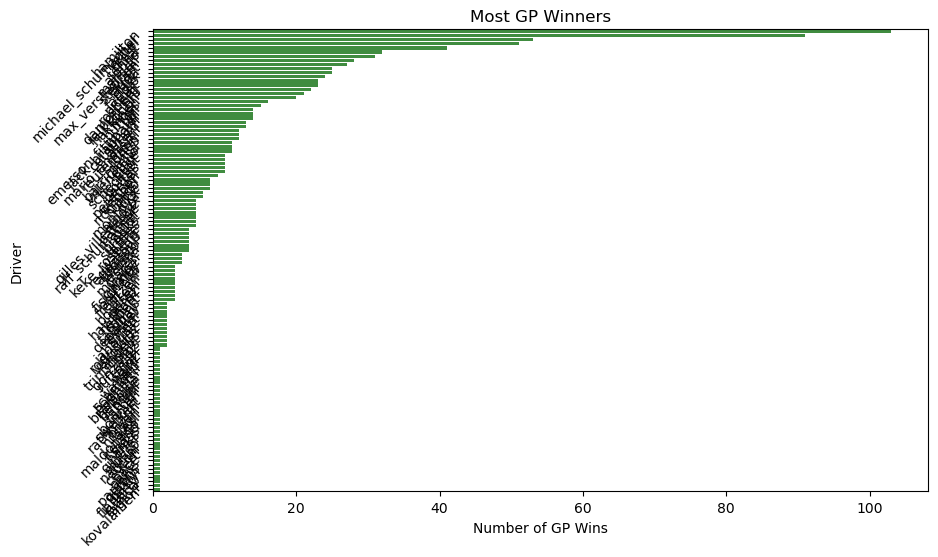

In [73]:
import seaborn as sns

# Define the DataFrame driver_winner with drivers who won the most races
driver_winner = df.loc[df['positionOrder'] == 1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=driver_winner, x='positionOrder', y='driver', color='green', alpha=0.8)
plt.title('Most GP Winners')
plt.xlabel('Number of GP Wins')
plt.ylabel('Driver')
plt.yticks(rotation=45)
plt.show()


In [74]:
# Filter out the top 10 drivers
top_10_drivers = driver_winner.head(10)

# Print the top 10 drivers
print(top_10_drivers)


               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4               senna             41
5              alonso             32
6             mansell             31
7      max_verstappen             28
8             stewart             27
9               lauda             25


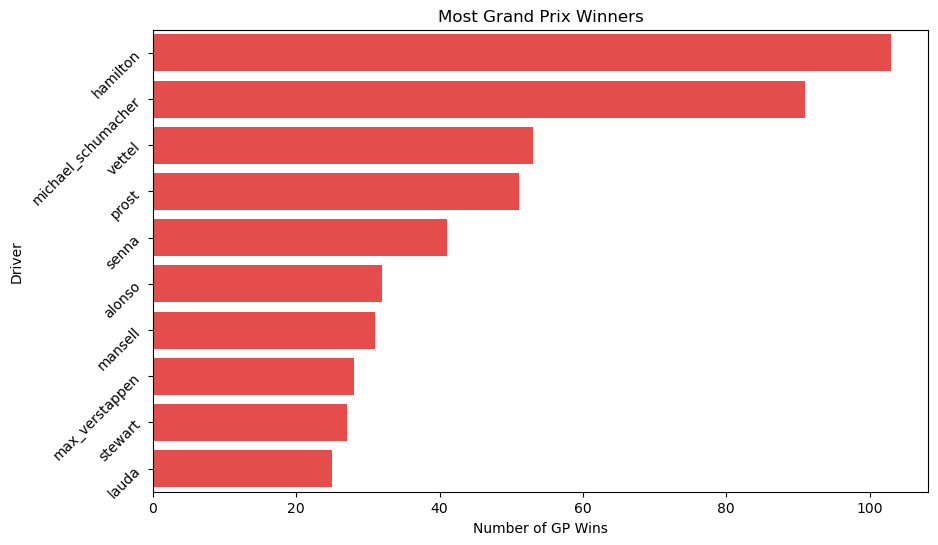

In [75]:
# Plot the barplot for the top 10 drivers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_drivers, x='positionOrder', y='driver', color='red', alpha=0.8)
plt.title('Most Grand Prix Winners')
plt.xlabel('Number of GP Wins')
plt.ylabel('Driver')
plt.yticks(rotation=45)
plt.show()


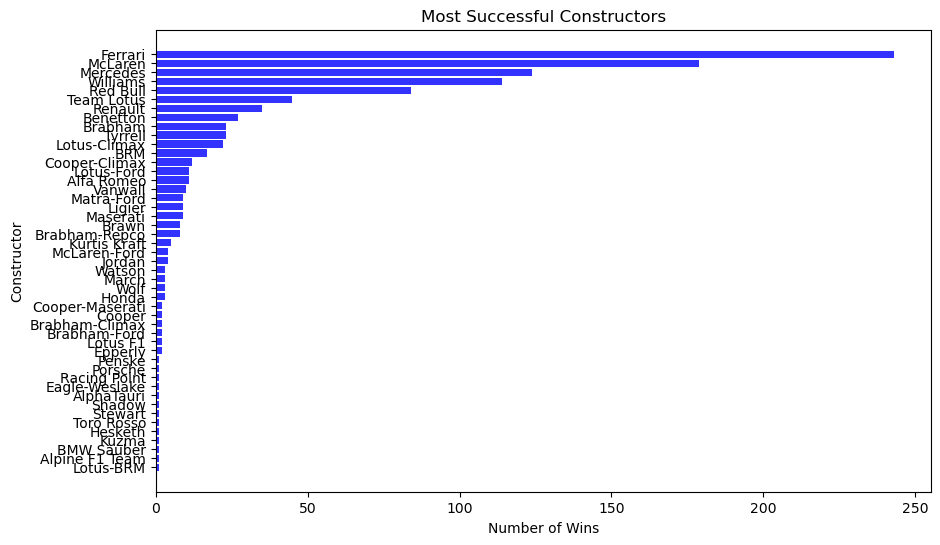

In [76]:
# Create constructor_winner DataFrame
constructor_winner = df.loc[df['positionOrder'] == 1].groupby('constructorname')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Plot the barplot for constructors
plt.figure(figsize=(10, 6))
plt.barh(constructor_winner['constructorname'], constructor_winner['positionOrder'], color='blue', alpha=0.8)
plt.title('Most Successful Constructors')
plt.xlabel('Number of Wins')
plt.ylabel('Constructor')
plt.gca().invert_yaxis()  # Invert y-axis to have the constructor with the most wins at the top
plt.show()

In [77]:
# Filter out the top 10 constructors
top_10_constructors = constructor_winner.head(10)

# Print the top 10 constructors
print(top_10_constructors)


  constructorname  positionOrder
0         Ferrari            243
1         McLaren            179
2        Mercedes            124
3        Williams            114
4        Red Bull             84
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


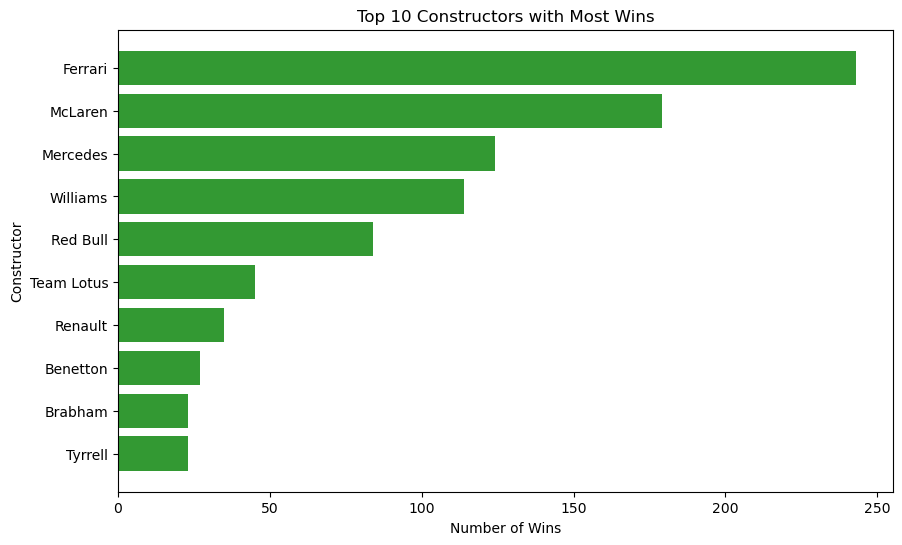

In [78]:
# Plot the barplot for the top 10 constructors
plt.figure(figsize=(10, 6))
plt.barh(top_10_constructors['constructorname'], top_10_constructors['positionOrder'], color='green', alpha=0.8)
plt.title('Top 10 Constructors with Most Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Constructor')
plt.gca().invert_yaxis()  # Invert y-axis to have the constructor with the most wins at the top
plt.show()


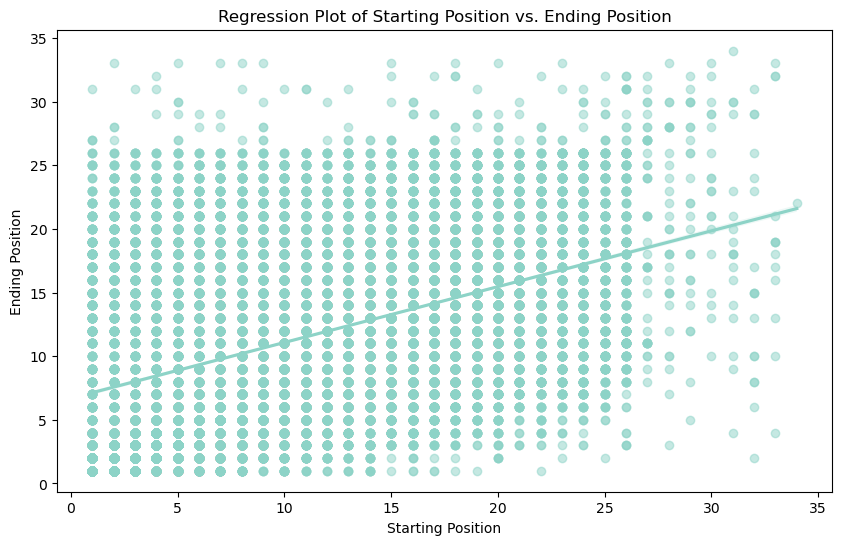

In [79]:
import seaborn as sns

# Remove rows where starting position is zero
df_no_zero = df[df['grid'] != 0]

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='grid', y='positionOrder', data=df_no_zero, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Starting Position vs. Ending Position')
plt.xlabel('Starting Position')
plt.ylabel('Ending Position')
plt.show()


C:\Users\VOSKER\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\VOSKER\AppData\Local\Temp\ipykernel_13260\439721710.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


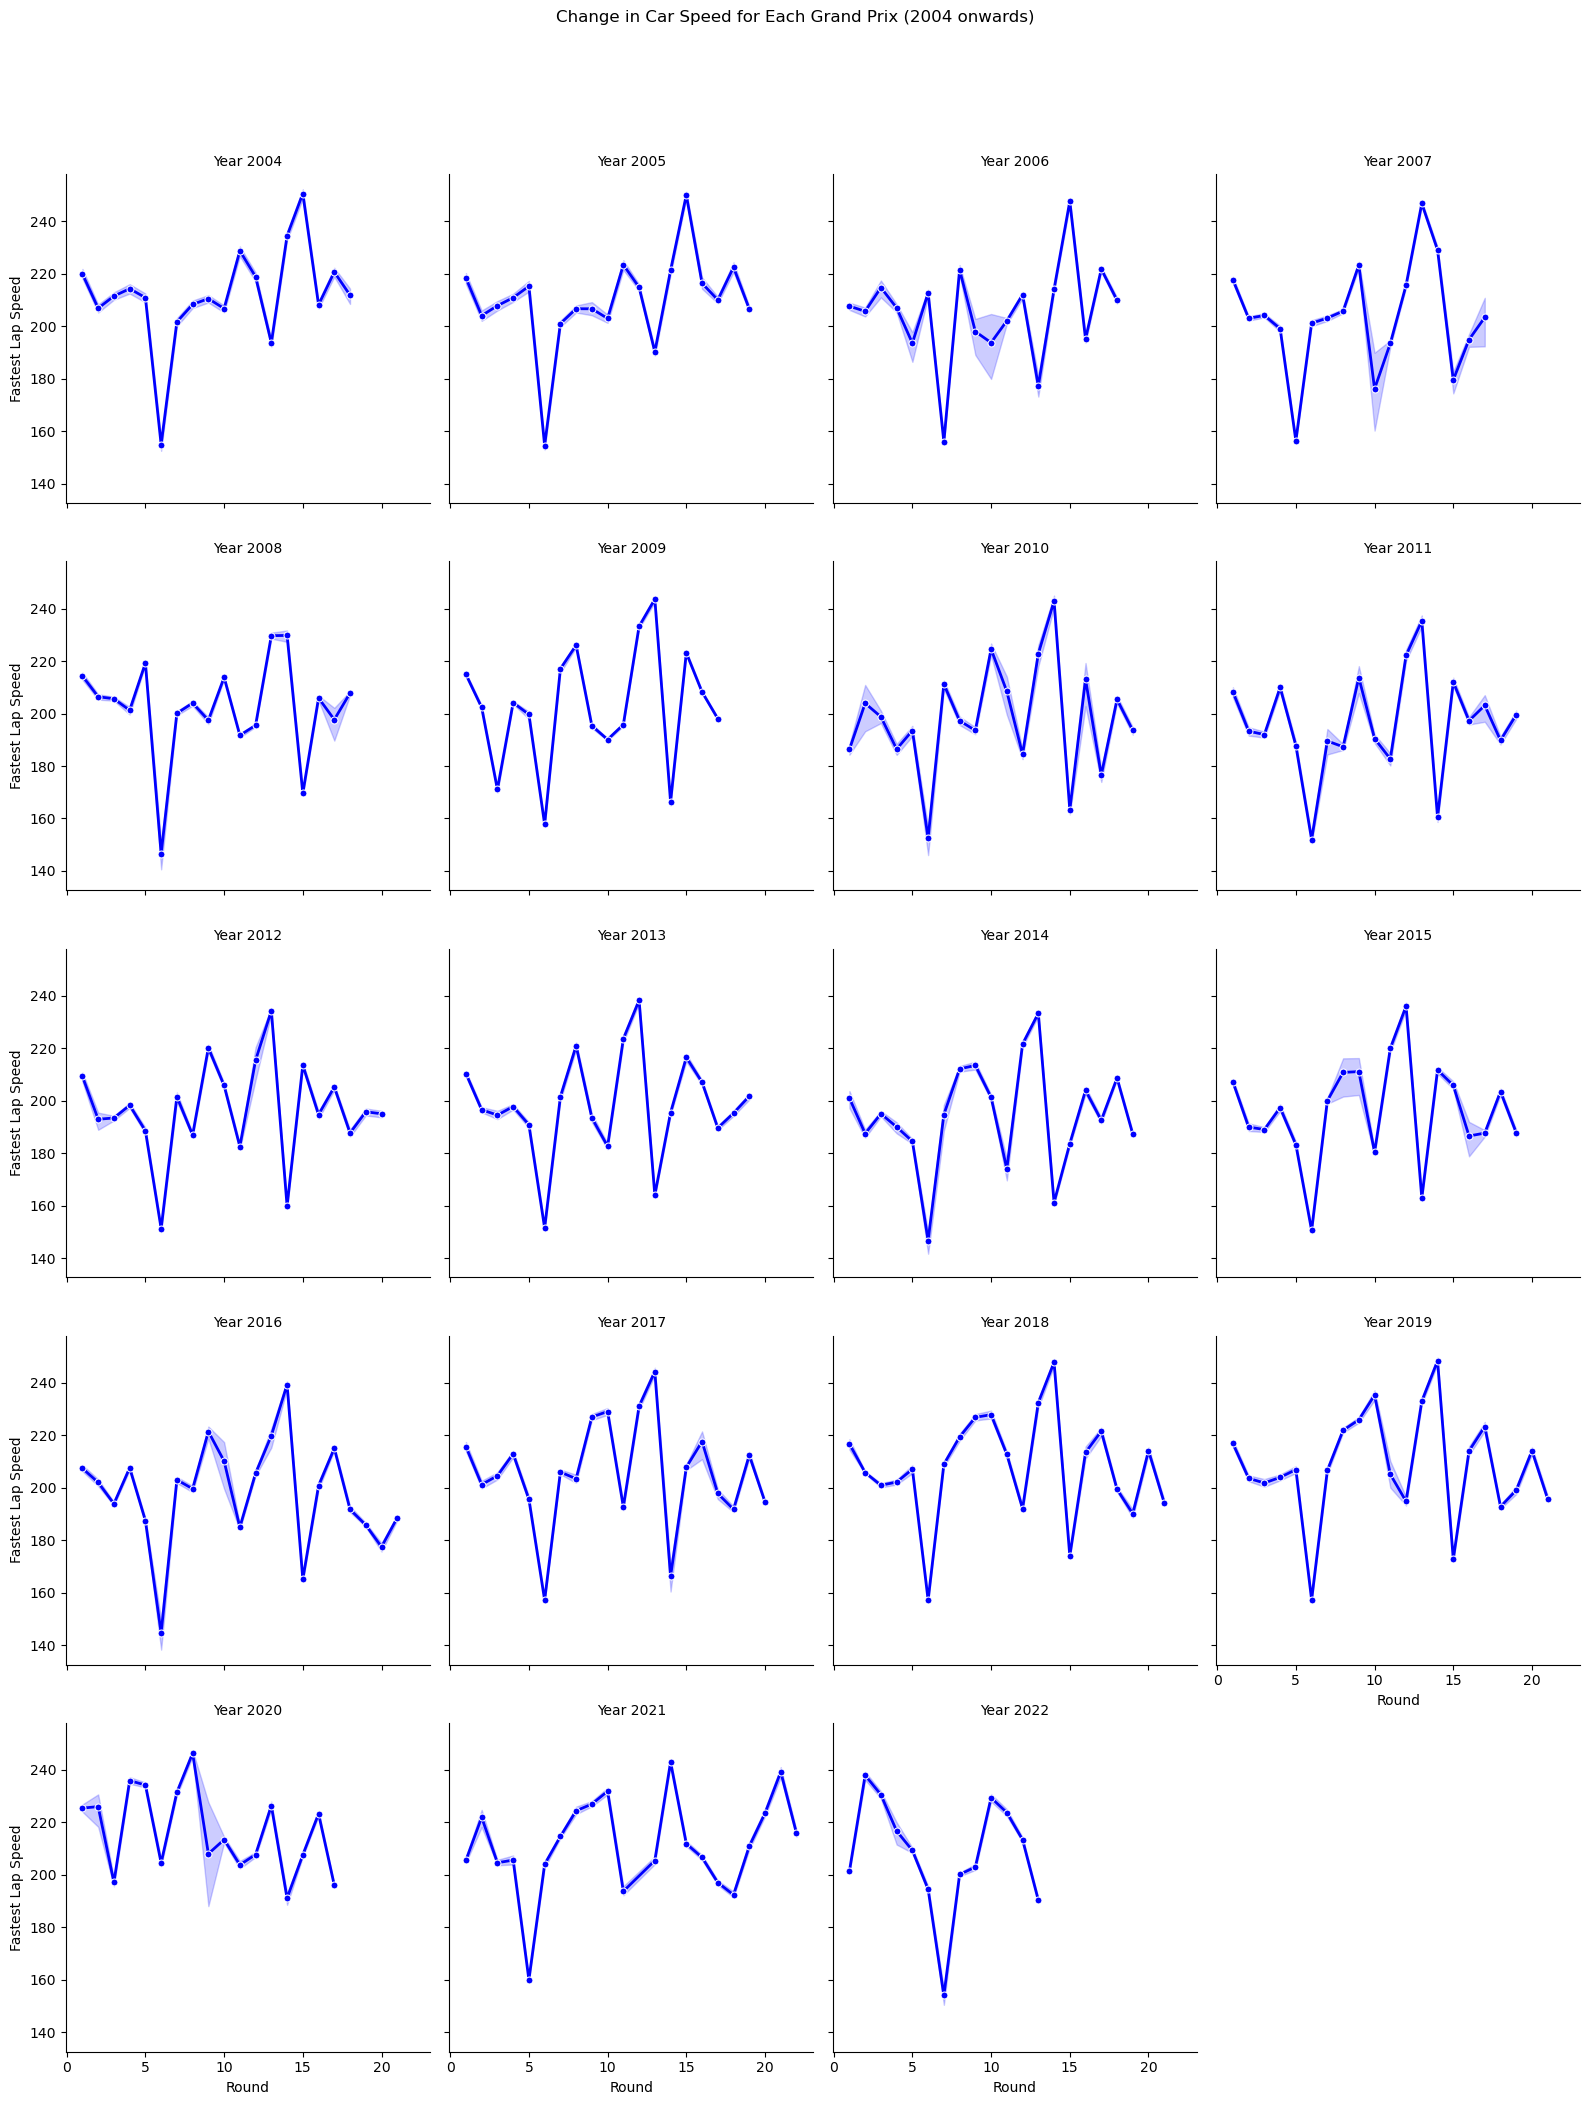

In [80]:
import seaborn as sns

# Filter the DataFrame for data from 2004 onwards
df_2004_onwards = df[df['year'] >= 2004]

# Create a FacetGrid plot
g = sns.FacetGrid(df_2004_onwards, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'round', 'fastestLapSpeed', marker='o', markersize=5, color='blue', linewidth=2)
g.set_axis_labels('Round', 'Fastest Lap Speed')
g.set_titles('Year {col_name}')
g.fig.suptitle('Change in Car Speed for Each Grand Prix (2004 onwards)', y=1.05)
plt.tight_layout()
plt.show()


In [81]:
# Calculate average finish position by driver and year
average_finish_position_by_driver_year = df.groupby(['year', 'driver'])['positionOrder'].mean()

# Print the result
print(average_finish_position_by_driver_year)



year  driver      
1950  ader            22.000000
      agabashian      28.000000
      ascari           8.600000
      banks           25.000000
      bettenhausen    18.000000
                        ...    
2022  sainz            8.000000
      stroll          12.076923
      tsunoda         14.461538
      vettel          11.818182
      zhou            14.615385
Name: positionOrder, Length: 3164, dtype: float64


In [82]:
# Calculate average finish position by constructor and year
average_finish_position_by_constructor_year = df.groupby(['year', 'constructorname'])['positionOrder'].mean()

# Print the result
print(average_finish_position_by_constructor_year)


year  constructorname
1950  Adams              27.000000
      Alfa Romeo          6.454545
      Alta               12.666667
      Cooper             19.000000
      Deidt              12.000000
                           ...    
2022  Haas F1 Team       13.884615
      McLaren            10.461538
      Mercedes            5.000000
      Red Bull            5.500000
      Williams           14.923077
Name: positionOrder, Length: 1091, dtype: float64


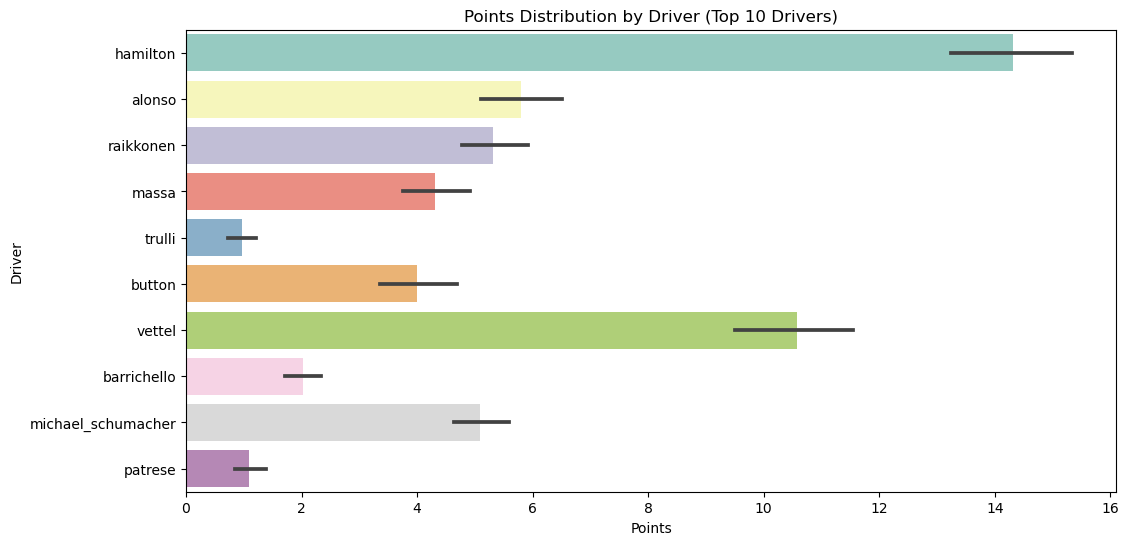

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 drivers
top_10_drivers = df['driver'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame to include only data for the top 10 drivers
df_top_10_drivers = df[df['driver'].isin(top_10_drivers)]

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='driver', data=df_top_10_drivers)
plt.title('Points Distribution by Driver (Top 10 Drivers)')
plt.xlabel('Points')
plt.ylabel('Driver')
plt.show()


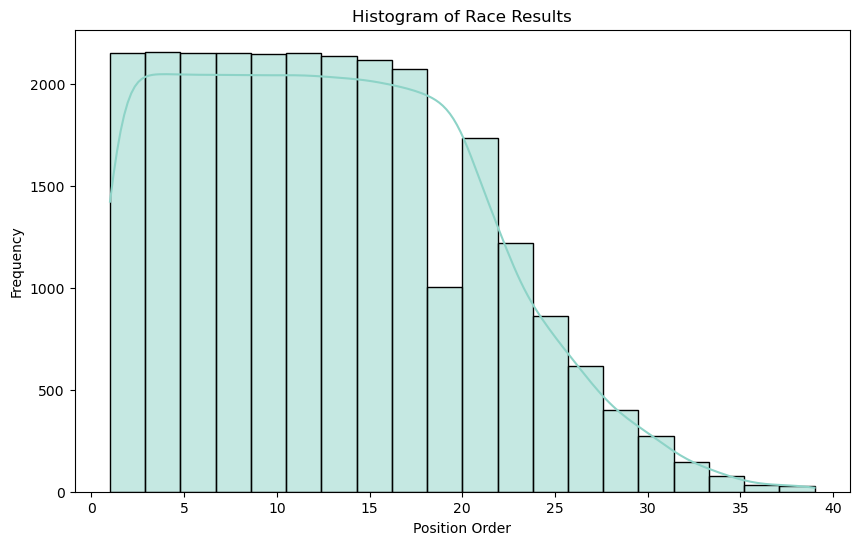

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['positionOrder'], bins=20, kde=True)
plt.title('Histogram of Race Results')
plt.xlabel('Position Order')
plt.ylabel('Frequency')
plt.show()


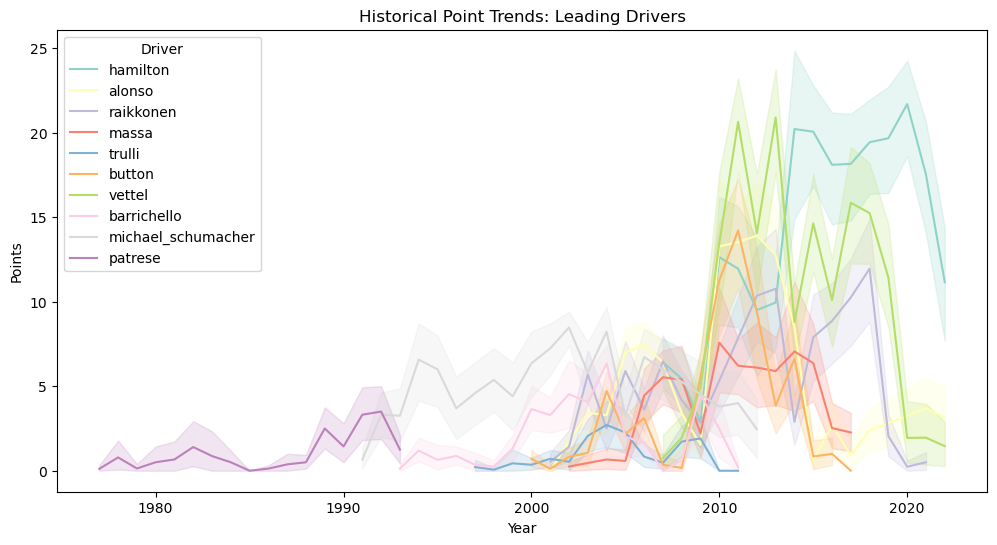

In [93]:
top_10_drivers = df['driver'].value_counts().nlargest(10).index.tolist()
df_top_10_drivers = df[df['driver'].isin(top_10_drivers)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='points', hue='driver', data=df_top_10_drivers)
plt.title('Historical Point Trends: Leading Drivers')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Driver')
plt.show()


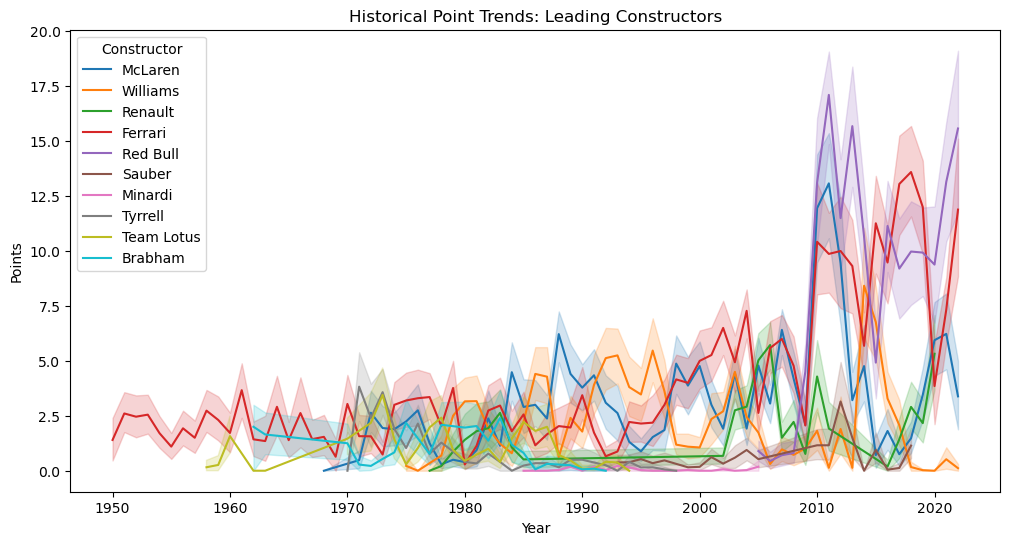

In [95]:
# Get the top 10 constructors
top_10_constructors = df['constructorname'].value_counts().nlargest(10).index.tolist()
df_top_10_constructors = df[df['constructorname'].isin(top_10_constructors)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='points', hue='constructorname', data=df_top_10_constructors, palette='tab10')
plt.title('Historical Point Trends: Leading Constructors')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(title='Constructor')
plt.show()


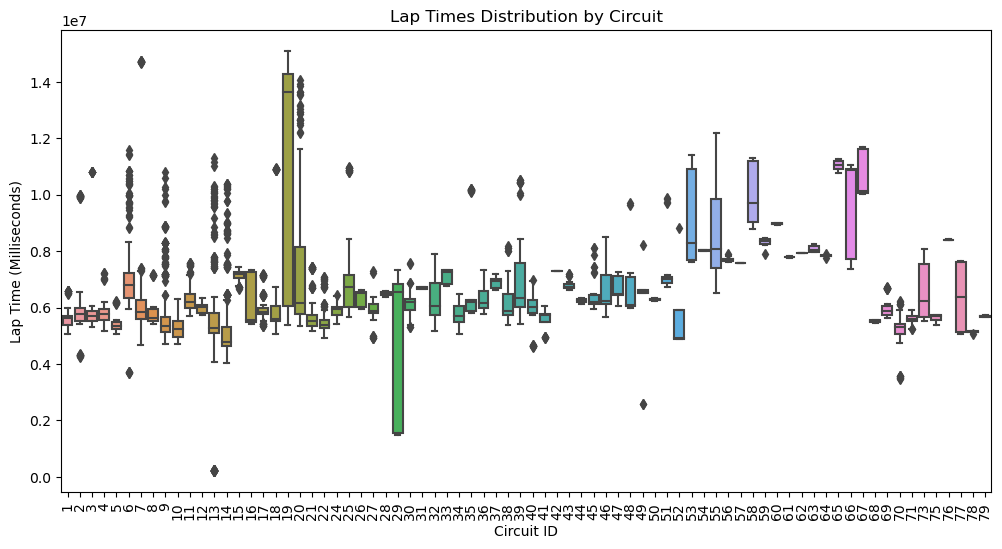

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='circuitId', y='milliseconds', data=df)
plt.title('Lap Times Distribution by Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Lap Time (Milliseconds)')
plt.xticks(rotation=90)
plt.show()


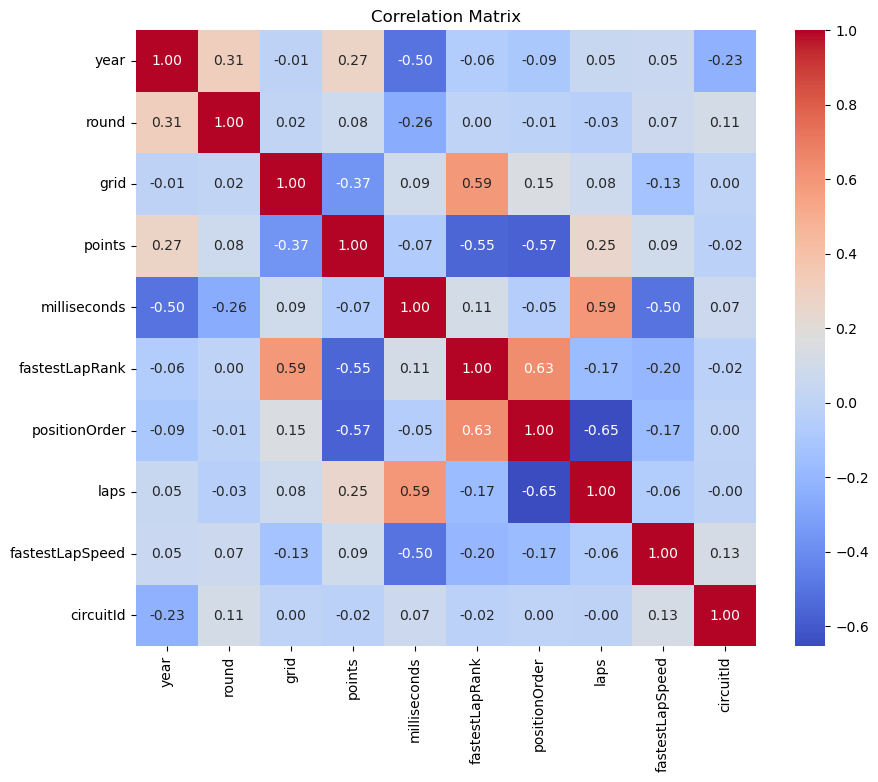

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numerical columns from correlation calculation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature engineering
X = df[['grid']].values
y = df['positionOrder'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 59.517643506665834


In [89]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


year                   0
driver                 0
round                  0
constructorname        0
grid                   0
points                 0
time               18696
milliseconds       18697
fastestLapRank     18249
positionOrder          0
laps                   0
fastestLap             0
fastestLapTime     18454
fastestLapSpeed    18454
circuitId              0
forename               0
surname                0
constructorRef         0
dtype: int64


In [97]:
# Convert 'fastestLapTime' to seconds
def time_to_seconds(time_str):
    if pd.isnull(time_str):
        return None
    parts = time_str.split(':')
    if len(parts) == 2:
        minutes = int(parts[0])
        seconds = float(parts[1])
        total_seconds = minutes * 60 + seconds
        return total_seconds
    elif len(parts) == 3:
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = float(parts[2])
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        return None

# Apply the function to convert 'fastestLapTime' to seconds
df['fastestLapTime_seconds'] = df['fastestLapTime'].apply(time_to_seconds)

# Now you can fill missing values in 'fastestLapTime_seconds' with appropriate values
# For example, you can fill missing values with the median or mean of the column:
median_fastestLapTime_seconds = df['fastestLapTime_seconds'].median()
df['fastestLapTime_seconds'].fillna(median_fastestLapTime_seconds, inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())



year                          0
driver                        0
round                         0
constructorname               0
grid                          0
points                        0
time                      18696
milliseconds              18697
fastestLapRank            18249
positionOrder                 0
laps                          0
fastestLap                    0
fastestLapTime            18454
fastestLapSpeed           18454
circuitId                     0
forename                      0
surname                       0
constructorRef                0
fastestLapTime_seconds        0
dtype: int64


In [98]:
# Feature engineering: Extract race duration from the 'time' column
df['time'] = pd.to_timedelta(df['time'], errors='coerce')



In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the features (X) and target variable (y)
X = df[['grid']].values
y = df['positionOrder'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()


In [100]:
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [101]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 59.517643506665834


In [102]:
# Feature engineering
# Example: Extract race duration from the 'time' column
df['race_duration_seconds'] = pd.to_timedelta(df['time']).dt.total_seconds() - df['milliseconds'] / 1000

# Convert race duration to datetime64[ns]
reference_date = pd.to_datetime('1970-01-01')
df['race_duration'] = reference_date + pd.to_timedelta(df['race_duration_seconds'], unit='s')



In [104]:
# Replace '\\N' with NaN
df.replace('\\N', pd.NA, inplace=True)

# Convert columns to numeric (excluding 'fastestLap' since it contains non-numeric values)
numeric_columns = ['grid', 'laps']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median of the respective columns
median_grid = df['grid'].median()
median_laps = df['laps'].median()

df['grid'].fillna(median_grid, inplace=True)
df['laps'].fillna(median_laps, inplace=True)

# Drop rows with missing values in 'fastestLap'
df.dropna(subset=['fastestLap'], inplace=True)

# Select features and target variable
X = df[['grid', 'laps', 'fastestLap']]
y = df['top_three_finish']

# Train-test split and logistic regression (same as previous code)
# ...



In [105]:
import pandas as pd

# Define the function to create the target variable
def create_top_three_finish(position):
    if position <= 3:
        return 1  # Top three finish
    else:
        return 0  # Not a top three finish

# Apply the function to create the target variable
df['top_three_finish'] = df['positionOrder'].apply(create_top_three_finish)

# Select features and target variable
X = df[['grid', 'laps', 'fastestLap']]
y = df['top_three_finish']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9015256588072122
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1233
           1       0.71      0.54      0.61       209

    accuracy                           0.90      1442
   macro avg       0.82      0.75      0.78      1442
weighted avg       0.89      0.90      0.90      1442



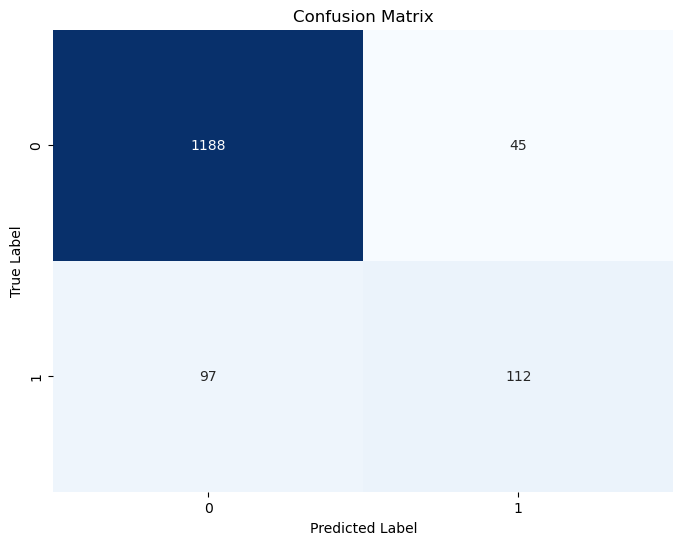

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


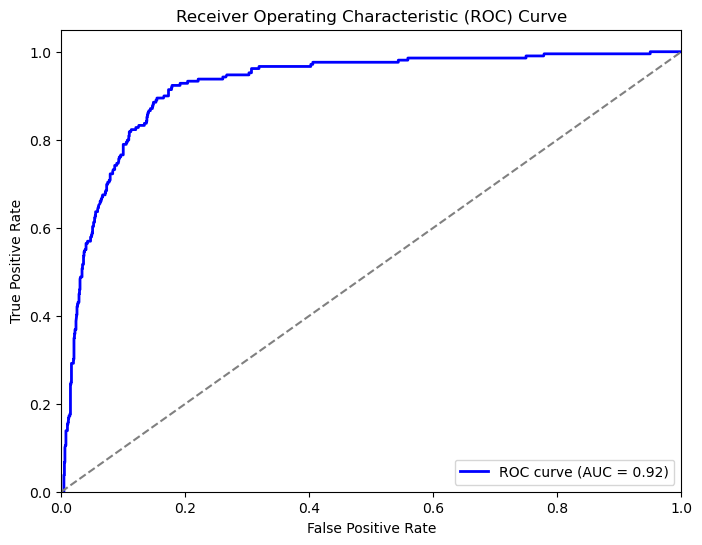

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


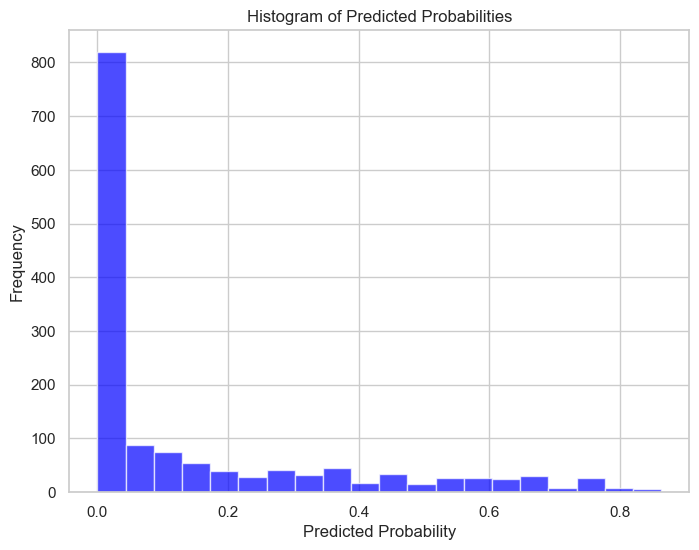

In [136]:
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=20, color='blue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()


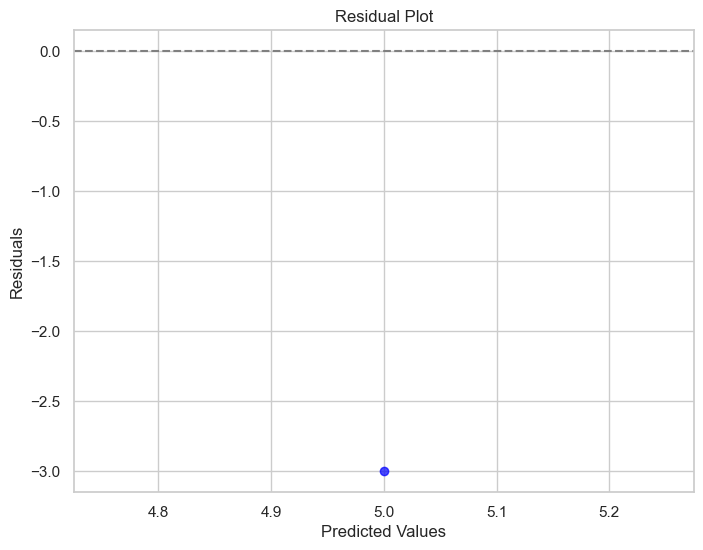

In [138]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

